<a href="https://colab.research.google.com/github/TheCascarrabias/andromeda/blob/main/Primera_red_neuronal_con_m%C3%A1s_capas_y_m%C3%A1s_neuronas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero importo tensorflow y la librería numpy

In [2]:
import tensorflow as tf
import numpy as np


Meto las 7 entradas de grados celsius y su conversión a grados fahrenheit

In [3]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38,], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Importo el framework Keras para hacer simplemente redes neuronales, y especifico la capa de salida como una capa de salida densa y le digo cuantas neuronas tiene esa capa ( en este caso solo necesito 1 ) y le especifico que tengo una capa de salida con una neurona solo también. Después le digo que modelo de keras voy a utilizar ( en este caso solo necesito un modelo básico como el secuencial )

In [5]:
#modelo = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=[1]),
    #tf.keras.layers.Dense(units=1) ])


# Definir las capas
oculta1 = tf.keras.layers.Dense(units=3, input_shape=(1,))
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)

# Crear el modelo secuencial
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

# Ver el resumen del modelo
modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

Compilar modelo

In [6]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Entrenar modelo: para entrenar uso la función fit indicándole los datos de entrada y de salida y le decimos cuantas vueltas tiene que dar para entrenar al modelo.

In [7]:
print("comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("modelo entrenado)")

comenzando entrenamiento...
modelo entrenado)


Ver el resultado de la función de pérdida: como ha ido ajustando el modelo cada vuelta.

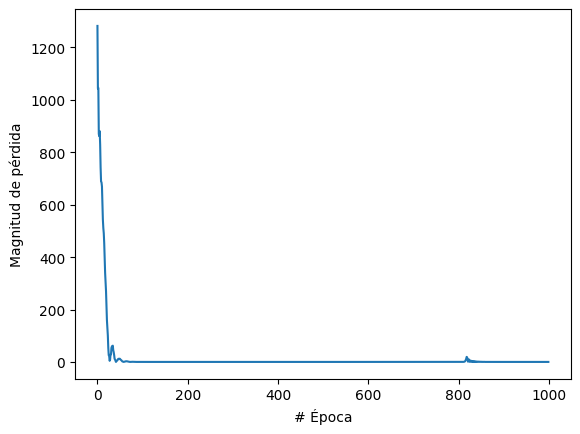

In [8]:
import matplotlib.pyplot as plt
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Probando el modelo

In [9]:
import numpy as np

print("Convierte grados Celsius a Fahrenheit")

# Convertir la entrada en un array de NumPy
entrada = np.array([100.0])
resultado = modelo.predict(entrada)

print("El resultado es " + str(resultado[0][0]) + " Fahrenheit!")

Convierte grados Celsius a Fahrenheit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
El resultado es 211.7461 Fahrenheit!


Imprime los valores de peso y sesgo del modelo después de entrenar.

In [11]:
# Imprimir los pesos y sesgos de cada capa en el modelo
for i, layer in enumerate(modelo.layers):
    pesos, sesgos = layer.get_weights()
    print(f"Capa {i + 1}:")
    print("  Pesos:", pesos)
    print("  Sesgos:", sesgos)

Capa 1:
  Pesos: [[-0.09041953  0.33672357 -0.51537484]]
  Sesgos: [ 2.0210142  2.9652815 -2.9378042]
Capa 2:
  Pesos: [[ 1.0081644  -0.0353464   0.20368245]
 [ 1.0268699   0.53361535 -1.2167962 ]
 [-0.67111695  0.08443449  0.291373  ]]
  Sesgos: [ 3.0367098  2.942768  -3.0142026]
Capa 3:
  Pesos: [[ 1.1825804]
 [ 1.4904541]
 [-1.5218484]]
  Sesgos: [2.9966419]
